In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:

from google.colab import auth
import gspread
from google.auth import default

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:

worksheet = gc.open('experiment1').sheet1

rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.head()

,input,output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [ ]:
x=df[['input']].values
y=df[['output']].values
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:
scalar=MinMaxScaler()

In [ ]:
scalar.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1=scalar.transform(x_train)

In [ ]:
ai=Sequential([
    Dense (units = 8, activation = 'relu'),
    Dense (units = 10, activation = 'relu'),
    Dense (units = 1)])

In [ ]:
#212222240120 YUVASAKTHI N.C
ai.compile(optimizer='rmsprop',loss='mse')
ai.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3804.0337
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3800.2458
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3797.5796
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 3795.3984
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3793.5115
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3791.8130
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3790.2427
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3788.7842
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 3787.4202
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3786.1160
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3784.8635
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3783.6653
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3782.5317
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3781.4260
Epoch 15/2000
1/1 ━━━━━━━━━━━━━

<Axes: >

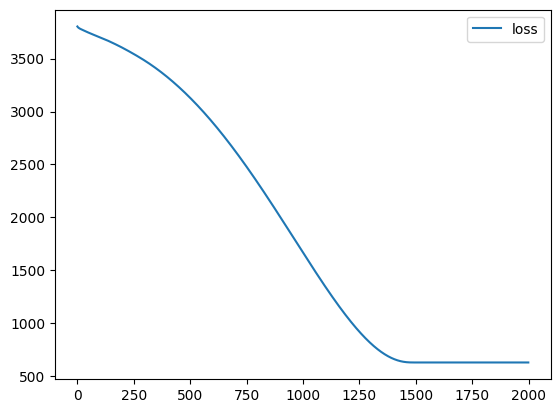

In [ ]:
loss_df = pd.DataFrame(ai.history.history)
loss_df.plot()
#212222240120

In [ ]:
#Yuvasakthi
X_test1 = scalar.transform(x_test)
ai.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - loss: 583.9492


583.9491577148438

In [ ]:
#212222240120
X_n1 = [[5]]
X_n1_1 = scalar.transform(X_n1)
ai.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[50.337284]], dtype=float32)